In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json as js

In [48]:
dirs = os.listdir()

list_param=[]
list_loss = []

for d in dirs:
    if "test_" in d and d != "test_parser.ipynb":
        open_file = open(d + "/log.txt", "r")
        lines = open_file.readlines()
        
        try:
            list_loss.append(eval(lines[35][5:]))
        except:
            print(d)

        list_param.append([])
        list_param[-1].append("\"test_name\" : \""+str(d)+"\"")
        list_param[-1].append("\"loss\" : "+str(list_loss[-1]))
        list_param[-1].append("\"last_loss\" : "+str(np.mean(list_loss[-1][-10:])))
        try:
            for i in range(39,60):
                
                lines_txt = lines[i][:-1]
                
                index = lines_txt.find(':')-1
                
                output_line = lines_txt[:index] + '"' + lines_txt[index:]

                index = output_line.find(':')

                if "dataset" in output_line or "mode" in output_line or "data_path" in output_line or "model_save_path" in output_line:
                    
                    output_line = output_line[:index+2] + '"' + output_line[index+2:] + '"'

                list_param[-1].append(str("\"")+str(output_line))

        except:
            pass
        open_file.close()
        
        

test_140
test_102


In [ ]:
plt.figure(figsize=(20,10))
for el in list_param:
    plt.plot(el)

In [51]:
dict_list = []

for i in list_param:
    dict_list.append(eval("{" + ", ".join(i) + "}"))



In [52]:
df = pd.DataFrame(dict_list)

df

,test_name,loss,last_loss,ID,lr,num_epochs,k,win_size,input_c,output_c,...,model_save_path,step,test_model,dataset_name,e_layers,n_heads,d_ff,d_model,dropout,quantile_treshold
0,test_52,"[-41.31123686809929, -45.522572459006795, -47....",-45.241264,52.0,0.0005,125.0,3.0,90.0,8.0,8.0,...,checkpoints,40.0,None,"['HEPP_L_data_test_1.csv', 'HEPP_L_data_train_...",5.0,8.0,512.0,256,0.0,"[[5_sigm, 0.99977], [6_sigm, 0.9999966], [7_si..."
1,test_71,"[-61.76959265129907, -62.95969196728298, -58.3...",-50.112569,71.0,0.0005,125.0,4.0,90.0,10.0,10.0,...,checkpoints,40.0,None,"['HEPP_LD_test.csv', 'HEPP_LD_train.csv']",5.0,8.0,512.0,1024,0.0,"[[5_sigm, 0.99977], [6_sigm, 0.9999966], [7_si..."
2,test_97,"[-57.17864469425407, -61.00413915211569, -61.2...",-62.176730,97.0,0.0005,140.0,4.0,100.0,64.0,64.0,...,checkpoints,20.0,None,"['HEPP_L_split_test.csv', 'HEPP_L_split_train....",3.0,8.0,512.0,256,0.0,"[[4_sigm, 0.999], [5_sigm, 0.99987]]"
3,test_6,"[-47.288031245406685, -48.59011506714849, -48....",-48.973539,6.0,0.0001,200.0,3.0,50.0,10.0,10.0,...,checkpoints,5.0,None,"['HEPP_LD_test.csv', 'HEPP_LD_train.csv']",3.0,8.0,512.0,512,0.0,0.999997
4,test_56,"[-44.18166801759175, -47.64139670985086, -47.8...",-45.026488,56.0,0.0005,125.0,3.0,80.0,10.0,10.0,...,checkpoints,40.0,None,"['HEPP_LD_test.csv', 'HEPP_LD_train.csv']",4.0,8.0,512.0,256,0.0,"[[5_sigm, 0.99977], [6_sigm, 0.9999966], [7_si..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,test_14,"[-42.50997087906818, -46.7967722756522, -47.64...",-45.601546,14.0,0.0005,125.0,3.0,80.0,8.0,8.0,...,checkpoints,40.0,None,"['HEPP_L_data_test_1.csv', 'HEPP_L_data_train_...",3.0,16.0,256.0,512,0.0,"[[5_sigm, 0.99977], [6_sigm, 0.9999966], [7_si..."
87,test_47,"[-59.332130957622915, -63.586529167330994, -63...",-50.673381,47.0,0.0005,125.0,4.0,80.0,8.0,8.0,...,checkpoints,40.0,None,"['HEPP_L_data_test_1.csv', 'HEPP_L_data_train_...",5.0,8.0,512.0,1024,0.0,"[[5_sigm, 0.99977], [6_sigm, 0.9999966], [7_si..."
88,test_63,"[-60.93243145091193, -56.88231752599989, -54.7...",-50.970828,63.0,0.0005,125.0,4.0,80.0,10.0,10.0,...,checkpoints,40.0,None,"['HEPP_LD_test.csv', 'HEPP_LD_train.csv']",5.0,8.0,512.0,1024,0.0,"[[5_sigm, 0.99977], [6_sigm, 0.9999966], [7_si..."
89,test_85,"[-56.90876778014406, -60.59101207527572, -60.8...",-61.389314,85.0,0.0005,140.0,4.0,90.0,64.0,64.0,...,checkpoints,20.0,None,"['HEPP_L_split_test.csv', 'HEPP_L_split_train....",4.0,8.0,512.0,256,0.0,"[[4_sigm, 0.999], [5_sigm, 0.99987]]"


In [30]:
df["dataset_name"][0]

"['HEPP_L_data_test_1.csv', 'HEPP_L_data_train_1.csv']"

In [56]:
#df.sort_values(by=['last_loss']).where(df['dataset_name'] == "['HEPP_LD_test.csv', 'HEPP_LD_train.csv']").dropna()
df.sort_values(by=['last_loss'])#.where(df['dataset_name'] == "['HEPP_L_split_test.csv', 'HEPP_L_split_train.csv']").dropna()

,test_name,loss,last_loss,ID,lr,num_epochs,k,win_size,input_c,output_c,...,model_save_path,step,test_model,dataset_name,e_layers,n_heads,d_ff,d_model,dropout,quantile_treshold
48,test_131,"[-71.79476528967211, -78.82105524668437, -79.2...",-79.736282,131.0,0.0005,140.0,5.0,90.0,64.0,64.0,...,checkpoints,20.0,None,"['HEPP_L_split_test.csv', 'HEPP_L_split_train....",3.0,10.0,512.0,256,0.0,"[[4_sigm, 0.999], [5_sigm, 0.99987]]"
31,test_91,"[-71.82942846149741, -77.60316499264654, -79.0...",-78.239851,91.0,0.0005,140.0,5.0,90.0,64.0,64.0,...,checkpoints,20.0,None,"['HEPP_L_split_test.csv', 'HEPP_L_split_train....",3.0,10.0,512.0,256,0.0,"[[4_sigm, 0.999], [5_sigm, 0.99987]]"
60,test_83,"[-71.76564169786647, -78.33279976302278, -79.3...",-77.120636,83.0,0.0005,140.0,5.0,90.0,64.0,64.0,...,checkpoints,20.0,None,"['HEPP_L_split_test.csv', 'HEPP_L_split_train....",3.0,8.0,512.0,256,0.0,"[[4_sigm, 0.999], [5_sigm, 0.99987]]"
24,test_99,"[-71.88323161416425, -76.95590374426928, -79.0...",-76.568964,99.0,0.0005,140.0,5.0,100.0,64.0,64.0,...,checkpoints,20.0,None,"['HEPP_L_split_test.csv', 'HEPP_L_split_train....",3.0,8.0,512.0,256,0.0,"[[4_sigm, 0.999], [5_sigm, 0.99987]]"
9,test_100,"[-75.35066791922746, -79.40922254002737, -79.6...",-76.321498,100.0,0.0005,140.0,5.0,100.0,64.0,64.0,...,checkpoints,20.0,None,"['HEPP_L_split_test.csv', 'HEPP_L_split_train....",3.0,8.0,512.0,512,0.0,"[[4_sigm, 0.999], [5_sigm, 0.99987]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,test_53,"[-43.86757879841085, -46.065454093777404, -46....",-39.839757,53.0,0.0005,125.0,3.0,90.0,8.0,8.0,...,checkpoints,40.0,None,"['HEPP_L_data_test_1.csv', 'HEPP_L_data_train_...",5.0,8.0,512.0,1024,0.0,"[[5_sigm, 0.99977], [6_sigm, 0.9999966], [7_si..."
62,test_69,"[-46.500953312431065, -47.675761461257935, -42...",-38.958333,69.0,0.0005,125.0,3.0,90.0,10.0,10.0,...,checkpoints,40.0,None,"['HEPP_LD_test.csv', 'HEPP_LD_train.csv']",5.0,8.0,512.0,1024,0.0,"[[5_sigm, 0.99977], [6_sigm, 0.9999966], [7_si..."
17,test_57,"[-46.45577099067824, -47.69846771444593, -44.8...",-35.941856,57.0,0.0005,125.0,3.0,80.0,10.0,10.0,...,checkpoints,40.0,None,"['HEPP_LD_test.csv', 'HEPP_LD_train.csv']",4.0,8.0,512.0,1024,0.0,"[[5_sigm, 0.99977], [6_sigm, 0.9999966], [7_si..."
75,test_45,"[-44.040825658915, -47.55804311012735, -46.053...",-35.774795,45.0,0.0005,125.0,3.0,80.0,8.0,8.0,...,checkpoints,40.0,None,"['HEPP_L_data_test_1.csv', 'HEPP_L_data_train_...",5.0,8.0,512.0,1024,0.0,"[[5_sigm, 0.99977], [6_sigm, 0.9999966], [7_si..."


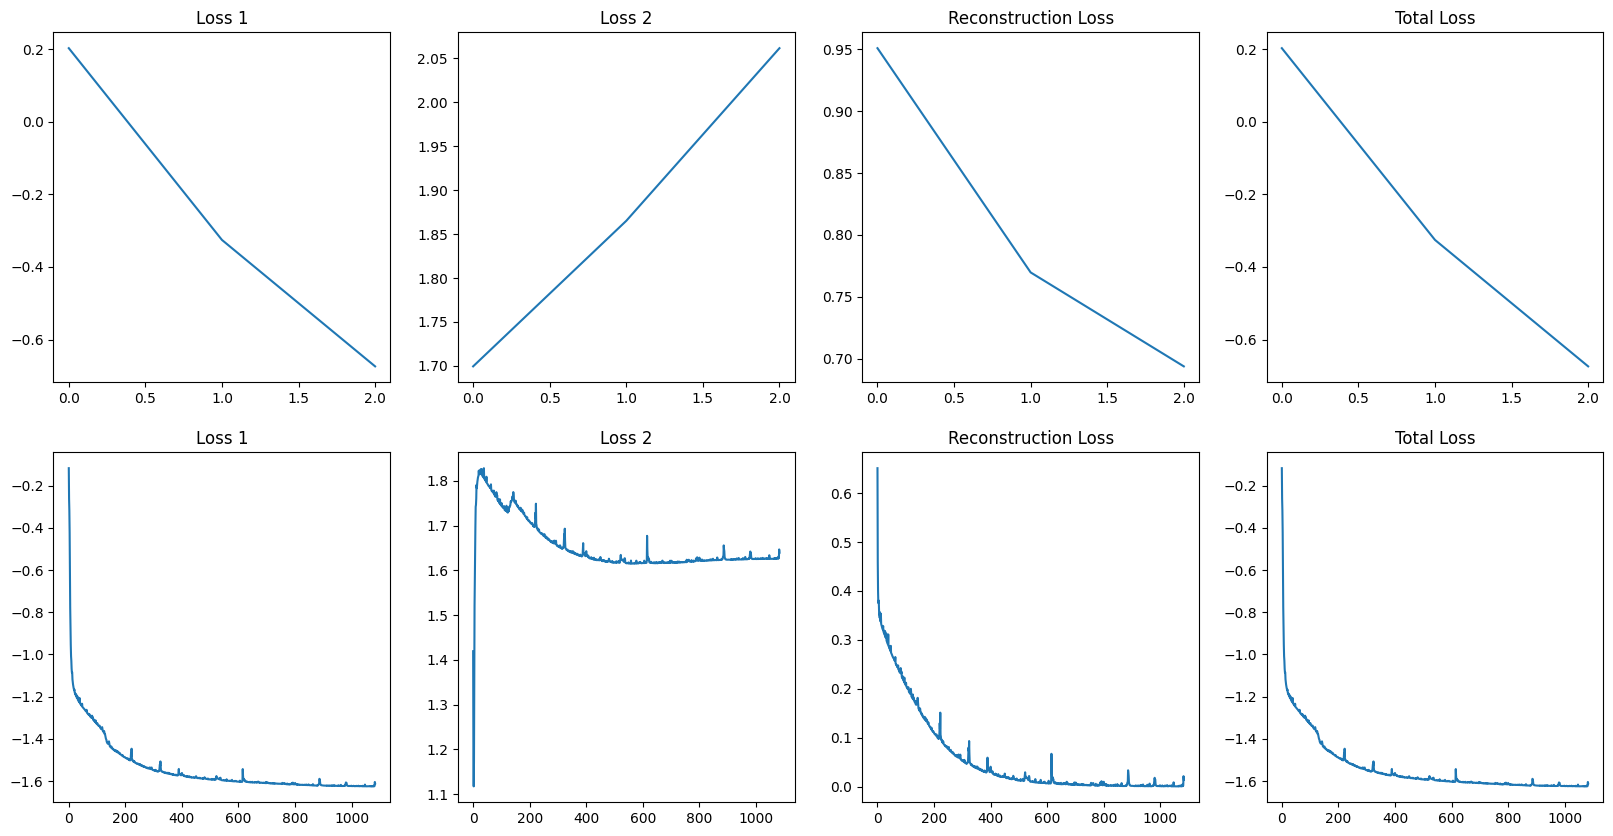

In [4]:
ID = [205,300]

fig, ax = plt.subplots(len(ID),4, figsize=(20,10))

for indx, i in enumerate(ID):
    
    f = open(f"test_{i}/loss.txt", "r")
    
    loss_1 = eval(f.readline())
    loss_2 = eval(f.readline())
    rec_loss = eval(f.readline())
    tot_loss = eval(f.readline())

    ax[indx][0].plot(loss_1)
    ax[indx][0].set_title("Loss 1")
    ax[indx][1].plot(loss_2)
    ax[indx][1].set_title("Loss 2")
    ax[indx][2].plot(rec_loss)
    ax[indx][2].set_title("Reconstruction Loss")
    ax[indx][3].plot(tot_loss)
    ax[indx][3].set_title("Total Loss")

    f.close()


